In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime

In [3]:
pd.set_option('display.max_columns', None)

# Load Data

In [4]:
df_lines = pd.read_csv('nba_betting_money_line.csv')
df_games = pd.read_csv('nba_games_all.csv')

In [14]:
df_game_stats = pd.read_csv('nba_players_game_stats.csv')
df_game_stats[df_game_stats['game_date'] >= '2018-01-01'].head()

,season_id,player_id,player_name,team_id,team_abbreviation,team_name,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,season_type,season_year,season
1223192,22017,202347,Quincy Pondexter,1610612741,CHI,Chicago Bulls,21700759,2018-01-31,CHI @ POR,L,6,0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0,4.0,Regular Season,2017,2017-18
1246919,22017,203468,CJ McCollum,1610612757,POR,Portland Trail Blazers,21700547,2018-01-01,POR @ CHI,W,45,11,30.0,0.367,5.0,11.0,0.455,5.0,6.0,0.833,1.0,5.0,6.0,8.0,0.0,0.0,2.0,2.0,32,17.0,Regular Season,2017,2017-18
1246920,22017,203200,Justin Holiday,1610612741,CHI,Chicago Bulls,21700547,2018-01-01,CHI vs. POR,L,41,4,10.0,0.400,1.0,4.0,0.250,5.0,5.0,1.000,0.0,7.0,7.0,4.0,0.0,1.0,0.0,3.0,14,-12.0,Regular Season,2017,2017-18
1246921,22017,1628374,Lauri Markkanen,1610612741,CHI,Chicago Bulls,21700547,2018-01-01,CHI vs. POR,L,34,7,12.0,0.583,4.0,6.0,0.667,1.0,2.0,0.500,0.0,8.0,8.0,1.0,0.0,1.0,0.0,2.0,19,-14.0,Regular Season,2017,2017-18
1246922,22017,202329,Al-Farouq Aminu,1610612757,POR,Portland Trail Blazers,21700547,2018-01-01,POR @ CHI,W,41,9,17.0,0.529,5.0,7.0,0.714,1.0,1.0,1.000,1.0,6.0,7.0,1.0,1.0,0.0,1.0,4.0,24,13.0,Regular Season,2017,2017-18


In [5]:
df_lines.head()

,game_id,book_name,book_id,team_id,a_team_id,price1,price2
0,41100314,Pinnacle Sports,238,1610612759,1610612760,165.0,-183.0
1,41100314,5Dimes,19,1610612759,1610612760,165.0,-175.0
2,41100314,Bookmaker,93,1610612759,1610612760,160.0,-190.0
3,41100314,BetOnline,1096,1610612759,1610612760,165.0,-190.0
4,41100314,Bovada,999996,1610612759,1610612760,155.0,-175.0


In [9]:
df_games.head()

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,39.0,85.0,0.459,8.0,18.0,0.444,34.0,37.0,1.0,9.0,31.0,40,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09


# Data Processing

In [7]:
# calculate the median moneyline by game

df_lines_agg = df_lines.groupby(['game_id','team_id','a_team_id']).agg({'price1':'median','price2':'median'}).reset_index()

In [8]:
# string to date

df_games['game_date'] =  pd.to_datetime(df_games['game_date'], format="%Y-%m-%d")

In [10]:
# combine moneylines with games, keep only games with moneyline

df_gl = df_games.merge(df_lines_agg, how='inner', on=['game_id','team_id','a_team_id'])

In [11]:
# calculate whether a game is an upset
# with moneylines, negative indicates the favorite. -200 means the payout is $100 for every $200 wagered.
# positive indicates the underdog. +200 means the payout is $200 for every $100 wagered.
# we define an upset as a game where the winner had a positive moneyline, and the loser had a negative moneyline

df_gl['is_upset'] = df_gl.apply(lambda row: (row['price1'] > 0 and row['price2'] < 0 and row['wl'] == 'W') or 
                                            (row['price1'] < 0 and row['price2'] > 0 and row['wl'] == 'L'), axis=1)

In [12]:
df_gl.head()

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season,price1,price2,is_upset
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09,-150.0,131.0,False
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09,380.0,-499.5,False
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09,-182.5,160.0,False
3,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09,402.5,-500.0,False
4,20800395,2008-12-20,CHI vs. UTA,1610612762,f,L,17.0,12.0,0.586,240,38.0,79.0,0.481,2.0,11.0,0.182,20.0,22.0,1.0,12.0,21.0,33,21.0,9.0,5.0,20.0,19.0,98,1610612741,2008,Regular Season,2008-09,-135.0,120.0,True


In [15]:
# convert moneyline to decimal and fractional odds
# calculate a categorical size_of_underdog column

def moneyline_to_decimal(moneyline):
    """ convert moneyline to decimal odds """
    if moneyline > 0:
        return moneyline / 100 + 1
    elif moneyline < 0:
        return -100 / moneyline + 1
    elif moneyline == 0:
        return 2
    else:
        return None

def moneyline_to_fractional(moneyline):
    """ convert moneyline to fractional odds, returned as tuple (numerator, denominator) """
    if moneyline > 0:
        return (moneyline / 100, 1)
    elif moneyline < 0:
        return (1, -moneyline / 100)
    elif moneyline == 0:
        return (1, 1)
    else:
        return None

def size_of_underdog(row):
    """ apply to dataframe row. Create approximate buckets for size of underdog """
   
    # get fractional odds for the underdog
    if row['price1'] > 0 and row['price2'] < 0:
        fractional = moneyline_to_fractional(row['price1'])
    elif row['price1'] < 0 and row['price2'] > 0:
        fractional = moneyline_to_fractional(row['price2'])
    else:
        return "No Underdog"

    # calculate size of underdog
    numerator = fractional[0]
    denominator = fractional[1]
    rounded_n = int(round(numerator, 0))
    rounded_d = int(round(denominator, 0))
    if rounded_n >= 10:
        return "GTE 10 to 1"
    elif rounded_n <= 1:
        return "1 to 1"
    else:
        return f"{rounded_n} to {rounded_d}"

df_gl['decimal_odds1'] = df_gl['price1'].apply(moneyline_to_decimal)
df_gl['decimal_odds2'] = df_gl['price2'].apply(moneyline_to_decimal)
df_gl['fractional_odds1'] = df_gl['price1'].apply(moneyline_to_fractional)
df_gl['fractional_odds2'] = df_gl['price2'].apply(moneyline_to_fractional)
df_gl['size_of_underdog'] = df_gl.apply(size_of_underdog, axis=1)

In [16]:
df_gl.head(10)

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season,price1,price2,is_upset,decimal_odds1,decimal_odds2,fractional_odds1,fractional_odds2,size_of_underdog
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09,-150.0,131.0,False,1.666667,2.310000,"(1, 1.5)","(1.31, 1)",1 to 1
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09,380.0,-499.5,False,4.800000,1.200200,"(3.8, 1)","(1, 4.995)",4 to 1
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09,-182.5,160.0,False,1.547945,2.600000,"(1, 1.825)","(1.6, 1)",2 to 1
3,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09,402.5,-500.0,False,5.025000,1.200000,"(4.025, 1)","(1, 5.0)",4 to 1
4,20800395,2008-12-20,CHI vs. UTA,1610612762,f,L,17.0,12.0,0.586,240,38.0,79.0,0.481,2.0,11.0,0.182,20.0,22.0,1.0,12.0,21.0,33,21.0,9.0,5.0,20.0,19.0,98,1610612741,2008,Regular Season,2008-09,-135.0,120.0,True,1.740741,2.200000,"(1, 1.35)","(1.2, 1)",1 to 1
5,20801103,2009-03-30,GSW vs. MEM,1610612763,f,W,19.0,54.0,0.260,240,40.0,79.0,0.506,5.0,18.0,0.278,29.0,40.0,1.0,12.0,34.0,46,22.0,11.0,8.0,19.0,20.0,114,1610612744,2008,Regular Season,2008-09,187.5,-225.0,True,2.875000,1.444444,"(1.875, 1)","(1, 2.25)",2 to 1
6,20801090,2009-03-28,POR vs. MEM,1610612763,f,L,18.0,54.0,0.250,240,28.0,68.0,0.412,0.0,8.0,0.000,10.0,15.0,1.0,8.0,20.0,28,12.0,6.0,4.0,13.0,19.0,66,1610612757,2008,Regular Season,2008-09,800.0,-1150.0,False,9.000000,1.086957,"(8.0, 1)","(1, 11.5)",8 to 1
7,20800796,2009-02-17,UTA vs. MEM,1610612763,f,L,15.0,38.0,0.283,240,35.0,75.0,0.467,3.0,12.0,0.250,26.0,32.0,1.0,17.0,24.0,41,15.0,4.0,5.0,18.0,25.0,99,1610612762,2008,Regular Season,2008-09,568.0,-700.0,False,6.680000,1.142857,"(5.68, 1)","(1, 7.0)",6 to 1
8,20800634,2009-01-23,NYK vs. MEM,1610612763,f,L,11.0,31.0,0.262,240,30.0,77.0,0.390,7.0,16.0,0.438,21.0,29.0,1.0,15.0,25.0,40,13.0,7.0,1.0,17.0,25.0,88,1610612752,2008,Regular Season,2008-09,200.0,-240.0,False,3.000000,1.416667,"(2.0, 1)","(1, 2.4)",2 to 1
9,20800263,2008-12-03,ATL vs. MEM,1610612763,f,L,4.0,14.0,0.222,240,35.0,77.0,0.455,4.0,11.0,0.364,21.0,24.0,1.0,10.0,20.0,30,18.0,7.0,0.0,9.0,25.0,95,1610612737,2008,Regular Season,2008-09,377.5,-475.0,False,4.775000,1.210526,"(3.775, 1)","(1, 4.75)",4 to 1


# Data Exploration

In [11]:
# upset rates by season and season type

df_upset_rates = df_gl.groupby(['season_year','season_type']).agg(upset_count = ('is_upset','sum'),
                                                                  games_count = ('game_id','count')).reset_index()
df_upset_rates['upset_rate'] = df_upset_rates['upset_count'] / df_upset_rates['games_count']

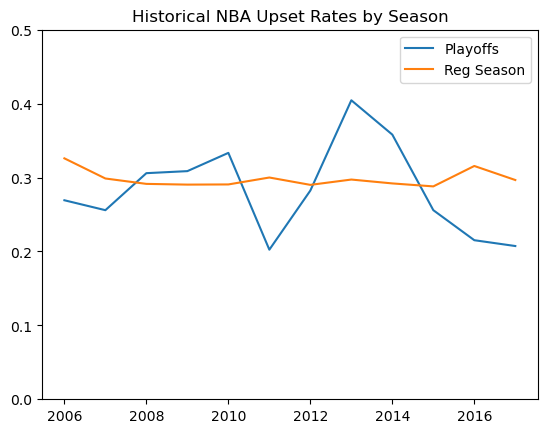

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(df_upset_rates[df_upset_rates['season_type']=='Playoffs']['season_year'],
        df_upset_rates[df_upset_rates['season_type']=='Playoffs']['upset_rate'],
        label='Playoffs')
ax.plot(df_upset_rates[df_upset_rates['season_type']=='Playoffs']['season_year'],
        df_upset_rates[df_upset_rates['season_type']=='Regular Season']['upset_rate'],
        label='Reg Season')
ax.set_ylim(0,0.5)
ax.set_title('Historical NBA Upset Rates by Season')
plt.legend()

In [13]:
# upset rates by size of underdog

df_upset_rates2 = df_gl.groupby(['size_of_underdog']).agg(upset_count = ('is_upset','sum'),
                                                                  games_count = ('game_id','count')).reset_index()
df_upset_rates2['upset_rate'] = df_upset_rates2['upset_count'] / df_upset_rates2['games_count']

In [14]:
df_upset_rates2

,size_of_underdog,upset_count,games_count,upset_rate
0,1 to 1,1760,3927,0.448179
1,2 to 1,1711,5091,0.336083
2,3 to 1,469,1984,0.236391
3,4 to 1,248,1259,0.196982
4,5 to 1,81,549,0.147541
5,6 to 1,60,457,0.131291
6,7 to 1,26,191,0.136126
7,8 to 1,20,244,0.081967
8,9 to 1,13,124,0.104839
9,GTE 10 to 1,41,655,0.062595


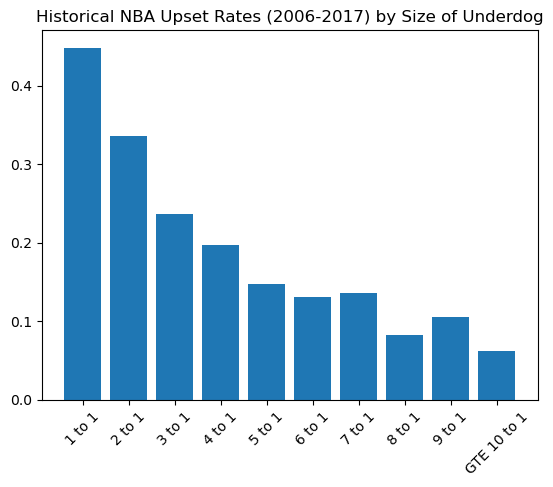

In [15]:
fig, ax = plt.subplots(1,1)
ax.bar(df_upset_rates2[df_upset_rates2['size_of_underdog']!='No Underdog']['size_of_underdog'],
       df_upset_rates2[df_upset_rates2['size_of_underdog']!='No Underdog']['upset_rate'])
# ax.set_ylim(0,0.5)
ax.set_title('Historical NBA Upset Rates (2006-2017) by Size of Underdog')
ax.tick_params(axis='x', labelrotation=45)